## `scipy.optimize` Package

- The `scipy.optimize` package provides several commonly used optimization algorithms.
- The modules is useful in the following scenarios:
    - Unconstrained and contrained minimzation of (multivariate) scalar functions
        - `minimize()` using a variety of algorithms (viz., BFGS, Nelder-Mead simplex, Newton Conjuage Gradient, COBYLA, SLSQP)
    - Global optimization routines (viz., `anneal(), basinhopping()`)
    - Least-squares minimization (`leastsq()`) and curve fitting (`curve_fit()`) rotunies
    - Scalar univariate functions minimizers (`minimize_scalar()`) and root finiders (`newton()`)
    - Multivariate equation system solvers (`root()`) using various algorithms (viz., hybrid Powell, Levenberg-Marquardt, Newton-Krylov)

### Unconstrained & Constrined minization of multivariable scalar functions

- The `scipy.optimize.minimize()` function provides a common interface to unconstrained and contrained mimization algorithms for finding the minimia.
- Consider the problem of minimizing the function:
$$f(x) = x^2 + 2x - 2$$
- The minimum value of the above function is $-3$ and is attained at $x = -1$.

### Python code to minimize the above function

In [2]:
import numpy as np
from scipy.optimize import minimize

def quadfunc(x):
    return x**3 + 2*np.sin(x) - 2

x0 = 5
res = minimize(quadfunc, x0) #powell

print(res)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1001583874.1392652
        x: [-1.001e+03]
      nit: 6
      jac: [ 3.003e+06]
 hess_inv: [[-3.332e-04]]
     nfev: 246
     njev: 117


### Least Squares
- Solve a nonlinear least-squares problem with bounds on the variables.
- Given the residuals $f(x)$-an $m-$dimensional real function of $n-$variables and the loss function $\rho(x)$-a scalar function, `least_squares()` find a local minimum of the cost function $F(x)$.
- For this consider the problme of finding local minimum for the Rosenbrock function:
$$ f(x) = \sum\limits_{i=1}^{N-1} 100(x_i - x_{i-1}^2)$$
- The function has a local minimum $0$ at $x=1$.

### Python code example to demonstrate least_squares

In [2]:
#Rosenbrock function
def rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), 1-x[0]])

In [3]:
#Code to minimize the function
from scipy.optimize import least_squares
x0 = np.array([2,2])
res = least_squares(rosenbrock, x0)

print(res)

 active_mask: array([0., 0.])
        cost: 9.866924291084687e-30
         fun: array([4.44089210e-15, 1.11022302e-16])
        grad: array([-8.89288649e-14,  4.44089210e-14])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 8.892886493421953e-14
      status: 1
     success: True
           x: array([1., 1.])


### Root Finding
- Consider the problem of finding the root of the equation $2x + 2\cos(x) = 0$.
- For this we can use `scipy.optimize.root()` or `scipy.optimize.newton()`.

In [4]:
import numpy as np
from scipy.optimize import root, newton
def func(x):
    return 2*x + 2*np.cos(x)
sol = root(func,0.2)
print(sol)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.450078e-10])
       r: array([-3.34722321])
  status: 1
 success: True
       x: array([-0.73908513])


In [5]:
import numpy as np
from scipy.optimize import root, newton
def func(x):
    return 2*x + 2*np.cos(x)
sol = newton(func,0.2)
print(sol)

-0.7390851332151606


### Nonlinear Least Square Problems
- A least square problem is an optimization problem with the objective function $g(\beta) = \sum\limits_{i=0}^m r_i(\beta)^2 = \lvert\lvert r(\beta)\rvert\rvert^2,$ where $r(\beta)$ is a vector with residuals $r_i(\beta) = y_i - f(x_i,\beta)$ for a set of $m$ observations $(x_i,y_i)$ and $\beta$ is a vector with unknown parameters that specifies the function $f(x,\beta)$.
- If the above problem is nonlinear in parameters $\beta$, then it is known as a nonlinear least square problem.
- These problems can be solved using `scipy.optimize.leastsq` method.

##### Example:
Let us consider estimating the parameter values for the function $f(x,\beta) = \beta_0 + \beta_1 \exp(-\beta_2 x^2)$ with $(\beta_0, \beta_1, \beta_2) = (0.25, 0.75, 0.5)$.

[0.27120028 0.74573524 0.48361229]


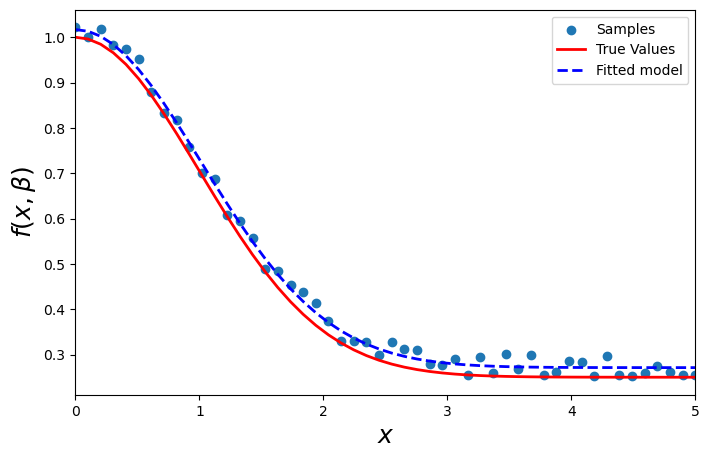

In [3]:
import numpy as np
import scipy.optimize as opt

# Define the function
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Generate the x-data and evaluate the actual y-data
xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

# Add noise to the actual y-data
ydata = y+0.05 * np.random.rand(len(xdata))

# Now define the functin to calcuate the residuals
def g(beta):
    return ydata - f(xdata,*beta)

# Define the initial guess for the paramter vector and then use the
# scipy.optimize.leastsq function solve for the best least square fit
beta_start = (1,1,1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
print(beta_opt)

# We now plot the actual data and fitted data
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(xdata, ydata, label='Samples')
ax.plot(xdata, y, '-r', lw=2, label='True Values')
ax.plot(xdata, f(xdata, *beta_opt), '--b', lw=2, label='Fitted model')
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
ax.legend()
plt.show()

## `scipy.optimize.curve_fit`
The `scipy.optimize.curve_fit` is a convenience wrapper around `scipy.optimize.leastsq`, which eliminates the need to explicitly define the residual function for the least square problem. The previous problem could therefore be solved more concisely using the following:

In [4]:
beta_opt, beta_cov = opt.curve_fit(f, xdata, ydata)
beta_opt

array([0.27120028, 0.74573524, 0.48361229])

#### Example - 2: Fit the data to the curve $y = 2.9\sin(1.5x)$

[1.         1.51786077 1.00000001]


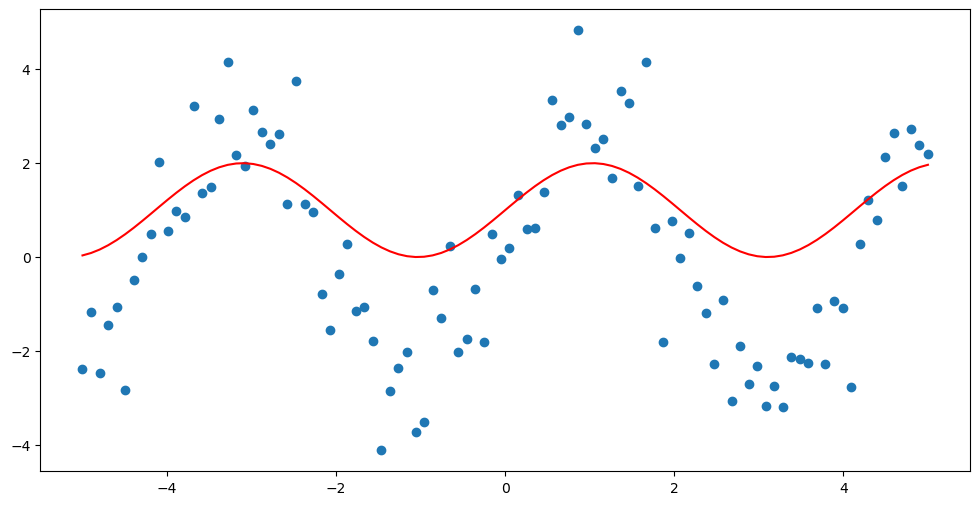

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_data = np.linspace(-5,5,100)
y_data = 2.9*np.sin(1.5*x_data) + np.random.normal(size=100)

plt.figure(figsize=(12,6))
plt.scatter(x_data,y_data,label='Data')

# Fitting function defintion
def func(x, a, b, c):
    return a * np.sin(b * x) + c

res_mat, cov_mat = curve_fit(func, x_data, y_data, bounds=([0, 1, 1],[1,2,2]))

# Display the parameter values
print(res_mat)

# Plot the data and fitted curve
plt.plot(x_data, func(x_data, *res_mat), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(res_mat))
plt.show()

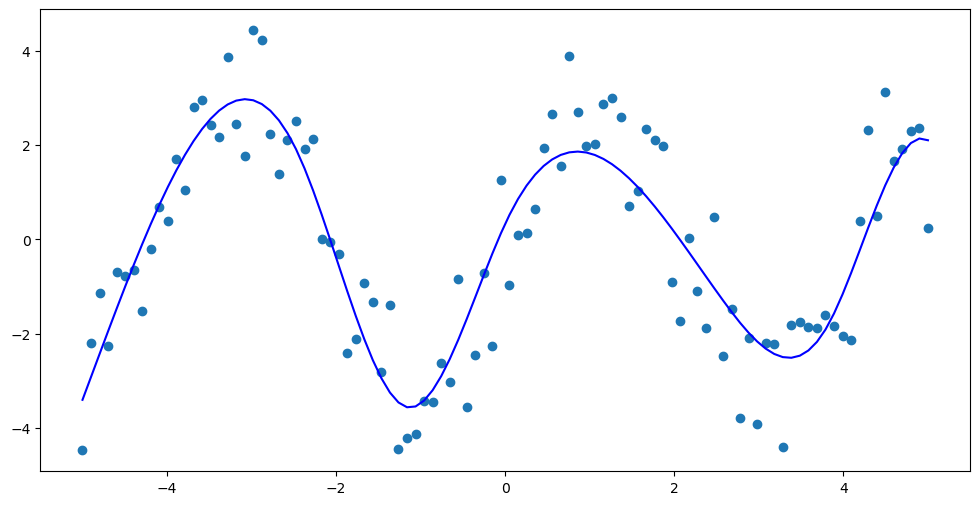

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline

np.random.seed(100)
x_data = np.linspace(-5,5,100)
y_data = 2.9*np.sin(1.5*x_data) + np.random.normal(size=100)

plt.figure(figsize=(12,6))
plt.scatter(x_data,y_data,label='Data')

# Fitting function defintion
def func(x, a, b, c):
    return a * np.sin(b * x) + c

res_mat, cov_mat = curve_fit(func, x_data, y_data)

# Display the parameter values
#print(res_mat)

ipl = interp1d(x_data,y_data,kind='cubic')

spl = UnivariateSpline(x_data,y_data)

# Plot the data and fitted curve
#plt.plot(x_data, ipl(x_data), 'r-')
plt.plot(x_data, spl(x_data), 'b-')

#plt.plot(x_data, func(x_data, *res_mat), 'b--',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(res_mat))
plt.show()

#### Example - 3: Fitting the maximum and minimum temepratures

Fitted parameter values for max temp:  [ 27.62925851 -10.63955647  -0.22590565]
Fitted parameter values for min temp:  [-37.71075225 -25.20712454  -0.65355892]


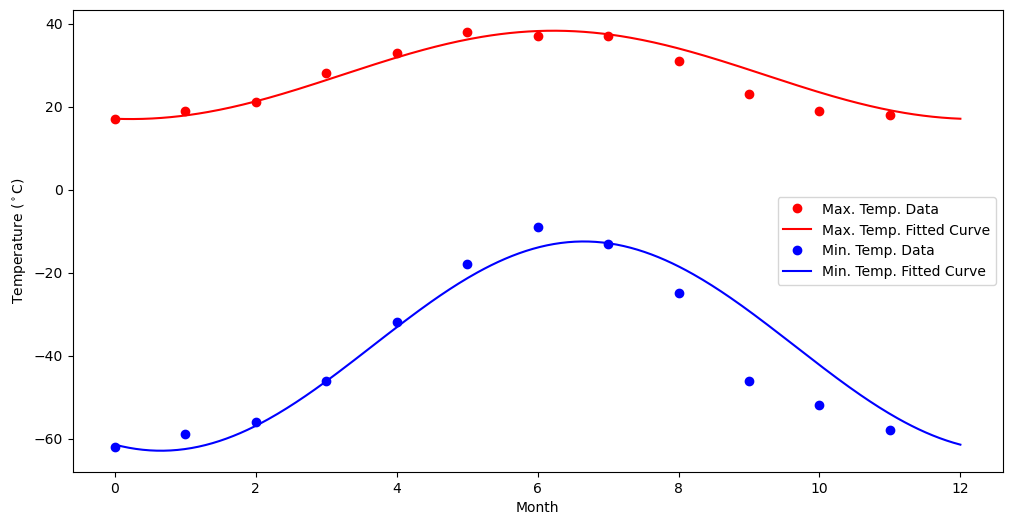

In [9]:
import numpy as np

months = np.arange(12)
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])

print('Fitted parameter values for max temp: ',res_max)

res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
print('Fitted parameter values for min temp: ',res_min)

days = np.linspace(0, 12, num=365)

months = np.arange(12)
plt.figure(figsize=(12,6))
plt.plot(months, temp_max, 'ro', label='Max. Temp. Data')
plt.plot(days, yearly_temps(days, *res_max), 'r-', \
         label='Max. Temp. Fitted Curve')
plt.plot(months, temp_min, 'bo', label='Min. Temp. Data')
plt.plot(days, yearly_temps(days, *res_min), 'b-', \
        label='Min. Temp. Fitted Curve')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()

plt.show()

#### Example - 4: Fitting a table of values to a function
Consider the following table of data
$$
\begin{array}{c|cccccc}
x & 0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5\\
y & 0.0674 & -0.9156 & 1.6253 & 3.0377 & 3.3535 & 7.9409
\end{array}
$$
to the curve $y = ax^3 + bx^2 + cx + d$.

[ 0.28401481  0.28863016  0.65066217 -0.28789127]


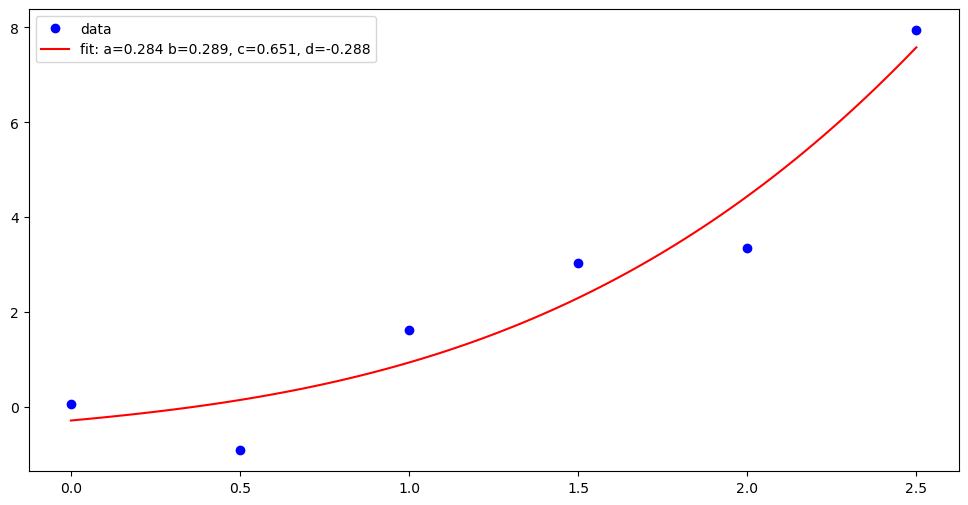

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array([0,0.5,1.0,1.5,2.0,2.5])
y = np.array([0.0674,-0.9156,1.6253,3.0377,3.3535,7.9409])

plt.figure(figsize=(12,6))
plt.plot(x, y, 'bo', label='data')

# Fitting function defintion
def func(x, a, b, c, d):
    return  a*x**3 + b*x**2 + c*x + d

# Fit the data and obtain the parameters
popt, pcov = curve_fit(func, x, y)

# Display the parameter values
print(popt)

x = np.linspace(0,2.5,100)

plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%0.3f b=%0.3f, c=%0.3f, d=%0.3f' % tuple(popt))
plt.legend()

plt.show()

### Constrained Optimization
Let us explore the process of fitting the data to a curve with constraints on the parameters.  In this case one need to pass extra arguments `bounds = (bounds_l, bounds_u)` where `bounds_l` is either a list or tuple with lower bounds and `bounds_u` is either a list or tuple with upper bounds.

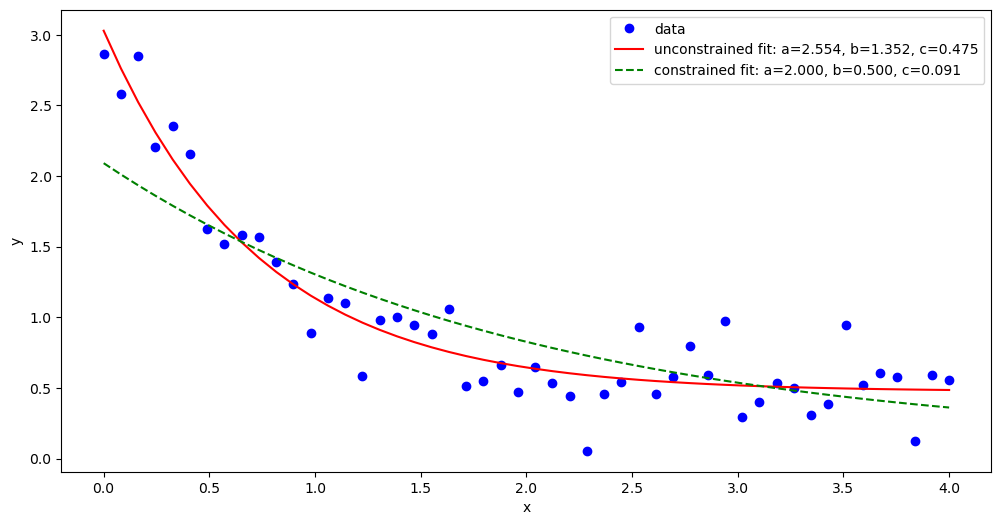

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fitting function defintion
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate some data with noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.figure(figsize=(12,6))
plt.plot(xdata, ydata, 'bo', label='data')

# Fit the data and obtain the parameters
popt, pcov = curve_fit(func, xdata, ydata)

# Display the parameter values
popt

# Plot the data and fitted curve
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='unconstrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constarined optimization
# If we require the parameters to lie in a given region
# i.e., 0 <= a <= 3; 0 <= b <= 1; 0 <= c <= 0.5

popt, pcov = curve_fit(func, xdata, ydata,  \
                       bounds = ([0, 0, 0], [2., 0.5, 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='constrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()